In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 9)
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

## Learning multiple weights at a time: Generalizing gradient descent

"You don’t learn to walk by following rules. You learn by doing and by falling over." —Richard Branson

### network with multiple inputs

In [ ]:
weights = [0.1, 0.2, -0.1]

In [ ]:
def weighted_sum(a, b):
    assert(len(a) == len(b))
    output = 0.0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

def ele_mul(number,vector):
    output = [0,0,0]
    assert(len(output) == len(vector))
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output


In [ ]:
def neural_network(x, weights):
    pred = weighted_sum(x, weights)
    return pred

In [ ]:
# Input corresponds to every entry for the first game of the season.
toes = [8.5 , 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2 , 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
x = [toes[0],wlrec[0],nfans[0]]

In [ ]:
pred = neural_network(x,weights)
error = (pred - true) ** 2
delta = pred - true

In [ ]:
print(f'Pred: {pred:.2f} -- Error: {error:.2f} -- Delta: {delta:.2f}')

In [ ]:
weight_deltas = ele_mul(delta,x)

In [ ]:
weight_deltas

In [ ]:
alpha = 0.01

for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i]
    print("Weights:" + str(weights))
    print("Weight Deltas:" + str(weight_deltas))

## Combine everything together

In [38]:
def neural_network(x, weights):
    out = 0
    for i in range(len(x)):
        out += (x[i] * weights[i])
    return out

def ele_mul(scalar, vector):
    out = [0,0,0]
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    return out

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
alpha = 0.01
weights = [0.5, 0.9, -0.01]
x = [toes[0],wlrec[0],nfans[0]]
errors = []
weightss = []

In [41]:
for iter in range(3):
    pred = neural_network(x,weights)
    error = (pred - true) ** 2 
    delta = pred - true
    weight_deltas = ele_mul(delta,x)
    
    print("Iteration:" + str(iter+1))
    print("Pred:" + str(pred))
    print("Error:" + str(error))
    print("Delta:" + str(delta))
    print("Weights:" + str(weights)) 
    print("Weight_Deltas:")
    print(str(weight_deltas))
    print()

    weightss.append(weights[2])
    errors.append(error)
    
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]

Iteration:1
Pred:1.0663245991245174
Error:0.004398952449027931
Delta:0.06632459912451738
Weights:[0.06914500377882811, 0.8670522649948516, -0.0708265877018125]
Weight_Deltas:
[0.5637590925583977, 0.043110989430936296, 0.07958951894942086]

Iteration:2
Pred:1.0171697805983595
Error:0.0002948013657958022
Delta:0.017169780598359496
Weights:[0.06350741285324413, 0.8666211551005422, -0.0716224828913067]
Weight_Deltas:
[0.14594313508605572, 0.011160357388933673, 0.020603736718031396]

Iteration:3
Pred:1.0044448269524002
Error:1.975648663678349e-05
Delta:0.004444826952400227
Weights:[0.06204798150238357, 0.8665095515266529, -0.07182852025848702]
Weight_Deltas:
[0.03778102909540193, 0.0028891375190601477, 0.005333792342880272]



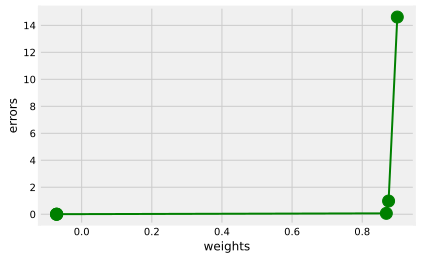

In [42]:
fig, ax = plt.subplots()
ax.plot(weightss, errors, color='green', marker='o',linewidth=2, markersize=12)
plt.xlabel('weights')
plt.ylabel('errors')
plt.show()

## Freezing one weight: What does it do?

In [46]:
def neural_network(input, weights):
    out = 0
    for i in range(len(input)):
        out += (input[i] * weights[i])
    return out

def ele_mul(scalar, vector):
    out = [0,0,0]
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    return out

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
alpha = 0.3
weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]

In [47]:
for iter in range(3):
    pred = neural_network(input,weights)
    error = (pred - true) ** 2
    delta = pred - true
    weight_deltas = ele_mul(delta,input)
    weight_deltas[0] = 0 # 
    
    print("Iteration:" + str(iter+1))
    print("Pred:" + str(pred))
    print("Error:" + str(error))
    print("Delta:" + str(delta))
    print("Weights:" + str(weights)) 
    print("Weight_Deltas:")
    print(str(weight_deltas))
    print()
    
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]

Iteration:1
Pred:0.8600000000000001
Error:0.01959999999999997
Delta:-0.1399999999999999
Weights:[0.1, 0.2, -0.1]
Weight_Deltas:
[0, -0.09099999999999994, -0.16799999999999987]

Iteration:2
Pred:0.9382250000000001
Error:0.003816150624999989
Delta:-0.06177499999999991
Weights:[0.1, 0.2273, -0.04960000000000005]
Weight_Deltas:
[0, -0.040153749999999946, -0.07412999999999989]

Iteration:3
Pred:0.97274178125
Error:0.000743010489422852
Delta:-0.027258218750000007
Weights:[0.1, 0.239346125, -0.02736100000000008]
Weight_Deltas:
[0, -0.017717842187500006, -0.032709862500000006]



## Neural networks can also make multiple predictions using only a single input.

In [58]:
weights = [0.3, 0.2, 0.9]
def neural_network(x, weights):
    pred = ele_mul(x,weights)
    return pred

In [63]:
wlrec = [0.65, 1.0, 1.0, 0.9]

hurt = [0.1, 0.0, 0.0, 0.1]
win = [1,1,0,1]
sad = [0.1, 0.0, 0.1, 0.2]

x = wlrec[0]
true = [hurt[0], win[0], sad[0]]
pred = neural_network(x,weights)
print(pred)
error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

print(f'error: {error}')
print(f'delta: {delta}')

[0.195, 0.13, 0.5850000000000001]
error: [0.009025, 0.7569, 0.2352250000000001]
delta: [0.095, -0.87, 0.4850000000000001]


In [64]:
def scalar_ele_mul(number,vector):
    output = [0,0,0]
    assert(len(output) == len(vector))
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output

weight_deltas = scalar_ele_mul(x,delta)

In [66]:
for i in range(len(weights)):
    weights[i] = weights[i] - alpha * weight_deltas[i]

In [67]:
print("Weights:" + str(weights))
print("Weight Deltas:" + str(weight_deltas))

Weights:[0.281475, 0.36965000000000003, 0.8054250000000001]
Weight Deltas:[0.061750000000000006, -0.5655, 0.3152500000000001]


## Gradient descent generalizes to arbitrarily large networks.